# Teads Kaggle Competition

Team: Neipa 

Member: Gabriel TRUONG, Edouard LACOURT, Maxime RAILLAT, Antoine ROYER-BOURNELLE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from category_encoders import TargetEncoder
from sklearn.impute import KNNImputer

# Data Collection

We get the data from the [EPF 2022 Teads Kaggle competition](https://www.kaggle.com/competitions/epf-montpellier-2022/overview) 

In [2]:
!kaggle competitions download -c epf-montpellier-2022
!unzip epf-montpellier-2022.zip
!rm epf-montpellier-2022.zip

 96%|████████████████████████████████████▍ | 82.0M/85.4M [00:02<00:00, 36.6MB/s]
100%|██████████████████████████████████████| 85.4M/85.4M [00:02<00:00, 31.1MB/s]
Archive:  epf-montpellier-2022.zip
  inflating: test.csv                
  inflating: testSubmissionFile.csv  
  inflating: train.csv               


In [3]:
data_train = pd.read_csv("train.csv")
data_train.head()

,auctionId,timeStamp,placementId,websiteId,hashedRefererDeepThree,country,opeartingSystem,browser,browserVersion,device,environmentType,integrationType,articleSafenessCategorization,isSold
0,001ed16b-dd08-4599-b8ef-4f56a373c454_6e5f1087-...,1603815466,120706,68203,1ae7c2d3c28b711c072d8e2eb3869fa59090669bdc153e...,US,Windows,Chrome,86_0,PC,js-web,2,safe,False
1,0024b36a-4fb5-4070-88fb-fc0bfb1909ed,1603974586,69454,42543,df1108bf6ae49dbccf5eab60ff9d04a6a09dda60ec7290...,RO,Android,Facebook App,293_0,Phone,js-fbwv,1,unsafe,False
2,003630fa-ad63-4283-be1b-141670132d70_f37c2b23-...,1604229969,100170,57703,cc6957e8aec85a4d920991c53874c5d0780bbfbd469802...,UK,Android,Facebook App,294_0,Phone,js-web,2,safe,True
3,0048c65a-ce76-43ba-98d2-8e87607468f8,1604156610,100446,57797,7fc0bb7a65d074e003cce786cda2b070f80dd47179c4b9...,ES,Android,Chrome Mobile,86_0,Phone,js-ampsf,1,safe,True
4,0056b8a7-54f9-4ac8-8d50-f725bf377872,1604004493,119517,67613,3a6552ccbf66ad166aa9005c3e08f70716abd676cfd87b...,FR,Android,Facebook App,293_0,Phone,js-fbwv,1,unsafe,False


In [4]:
df_test= pd.read_csv("test.csv")
df_test.head()

,auctionId,timeStamp,placementId,websiteId,hashedRefererDeepThree,country,opeartingSystem,browser,browserVersion,device,environmentType,integrationType,articleSafenessCategorization
0,00277acc-dee5-4065-a580-c49dbde5c02e_6c6fd7b0-...,1604180182,120706,68203,8448d2635d8ce25f3758907451fc740c4b2131693c7a8b...,CA,iOS,Facebook App,NaN,Phone,js-web,2,safe
1,0055d24f-bbf0-418d-84e7-df1d3124d6d6_60eaa750-...,1604145756,120706,68203,513dc346ab569ee76d6dbc927079b4049b1e9e95833d13...,US,Android,Facebook App,293_0,Phone,js-web,2,safe
2,005bc881-b650-4ccc-baa6-850c9710b0ea_15181501-...,1604095938,120706,68203,7b856dd2cffe043b51f48f9094a6a8bc58dbdea3bdd239...,MX,Android,Facebook App,274_0,Phone,js-web,2,safe
3,008c5f32-c29f-4726-8315-a2a4f2d10fb2_a4a0167f-...,1604257787,120706,68203,8448d2635d8ce25f3758907451fc740c4b2131693c7a8b...,US,iOS,Safari mobile,13_1,Phone,js-web,2,safe
4,00f96be1-59f2-43b6-a6d1-0668001cd08c_1014d516-...,1604265857,120706,68203,a64b4cf5e410623d0bb3d110b2d3183c1590f69e0e61af...,CA,Windows,Microsoft Edge,86_0,PC,js-web,2,unsafe


# Data Exploration

- Check missing data 
- Check if the target value is balanced

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967332 entries, 0 to 967331
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   auctionId                      967332 non-null  object
 1   timeStamp                      967332 non-null  int64 
 2   placementId                    967332 non-null  int64 
 3   websiteId                      967332 non-null  int64 
 4   hashedRefererDeepThree         951349 non-null  object
 5   country                        966900 non-null  object
 6   opeartingSystem                967332 non-null  object
 7   browser                        967332 non-null  object
 8   browserVersion                 837388 non-null  object
 9   device                         967332 non-null  object
 10  environmentType                967328 non-null  object
 11  integrationType                967332 non-null  int64 
 12  articleSafenessCategorization  967332 non-nu

In [6]:
data_train.describe()

,timeStamp,placementId,websiteId,integrationType
count,9.673320e+05,967332.000000,967332.000000,967332.000000
mean,1.603976e+09,114074.378447,57675.090327,1.805757
std,1.762639e+05,17598.066714,14200.058036,0.395617
min,1.603670e+09,18341.000000,13734.000000,1.000000
25%,1.603823e+09,108383.000000,49049.000000,2.000000
50%,1.603978e+09,120938.000000,60581.000000,2.000000
75%,1.604133e+09,124467.000000,68951.000000,2.000000
max,1.604275e+09,133258.000000,74126.000000,2.000000


We can see that 13% of the browserVersion column is missing. In this version, we will try to impute the missing value.

In [7]:
(data_train.isnull().sum()/len(data_train))*100

auctionId                         0.000000
timeStamp                         0.000000
placementId                       0.000000
websiteId                         0.000000
hashedRefererDeepThree            1.652277
country                           0.044659
opeartingSystem                   0.000000
browser                           0.000000
browserVersion                   13.433237
device                            0.000000
environmentType                   0.000414
integrationType                   0.000000
articleSafenessCategorization     0.000000
isSold                            0.000000
dtype: float64

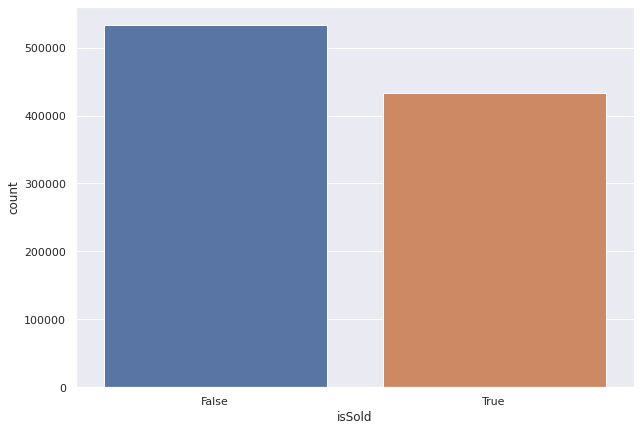

In [8]:
#See if isSold value are balanced
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.countplot(x="isSold", data=data_train)

# Data Wrangling
- Take care of the NaN Values
- Encode the categorical variables (train and test dataset)
- Split the data into train and test
  

## Function to do the data Wrangling

We will use functions so that it will be easier feature engineering.

In [9]:
def clean_df(df,colname):
    """ Clean the dataframe by removing the null values and replacing them with the mean of the column 
    
    Args:
        df (dataframe): dataframe to be cleaned
        colname (string): name of the column to be cleaned

    Returns:
        df (dataframe): cleaned dataframe
    """

    df = df.drop(columns=["auctionId"])
    for name in colname:
        df[name] = df[name].replace(np.nan,"unknown")
    return df

In [10]:
def get_dummies_encoding(df,colname):
    """ encode categorical data using the get_dummies function
    
    Args: 
        df (pandas dataframe): dataframe to encode
        colname (list): list of columns to encode

    Returns:
        df (pandas dataframe): encoded dataframe
    """

    for name in colname:
        encoded = pd.get_dummies(df[name])
        df = df.drop(columns=name)
        df = pd.concat([df,encoded],axis=1)
    return df

In [11]:
def target_encode(df_train,df_test,colname,target_name,encoder):
    """ Encode categorical data using the target encoder.
    
    Args: 
        df_train (pandas dataframe): train dataframe to fit_transform using the encoder
        df_test (pandas dataframe): test dataframe to transform using the encoder
        colname (list): list of columns to encode
        target_name (str): name of the target column
        encoder (sklearn encoder): encoder to use

    Returns:
        df_train (pandas dataframe): encoded train dataframe
        df_test (pandas dataframe): encoded test dataframe
    """
    
    for name in colname:
        df_train[name]= encoder.fit_transform(df_train[name],df_train[target_name])
        df_test[name]=encoder.transform(df_test[name])
    return df_train,df_test
    

In [12]:
def label_encode(df,colname,target_name):
    """ DEPRECATED :D """
    encoder = LabelEncoder()
    for name in colname:
        df[name]= encoder.fit_transform(df[name])
    return df

In [13]:
def drop_columns(df,colname):
    """ Drop columns from the dataframe.
    
    Args:
        df (pandas dataFrame): datafram to drop columns from
        colname (list): list of columns to drop
    
    Returns:
        df (pandas dataFrame): dataframe with dropped columns
    """
    for name in colname:
        df = df.drop(columns=name)
    return df

**Convert [timestamp](https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96)**

In [14]:
def splitTimeStamp(df):
    """ Split the timestamp column into separate columns.
    
    Args:
        df (pandas dataFrame): dataframe to split the timestamp column from
    
    Returns:
        df (pandas dataFrame): dataframe with the timestamp column split into separate columns
    """
    
    date = pd.to_datetime(df["timeStamp"],unit="s")
    df["year"] = date.dt.year
    df["month"] = date.dt.month
    df["week"] = date.dt.week
    df["day"] = date.dt.day
    df["hour"] = date.dt.hour
    df["minute"] = date.dt.minute
    df["second"] = date.dt.second
    df = df.drop(columns=['timeStamp'])
    return df

In [15]:
def concatFeaturesToTarget(df, featuresToConcat, target):
    """ Concatenate features to the target column.
        
        Args:
            df (pandas dataFrame): dataframe to concatenate features to the target column
            featuresToConcat (list): list of features to concatenate
            target (str): name of the target column

        Returns:
            df (pandas dataFrame): dataframe with the features concatenated to the target column
    """
    
    concatDf = pd.DataFrame()
    for feature in featuresToConcat:
        concatDf[feature+"X"+target] = df[target].str.cat(df[feature].astype(str),sep=",")
    return concatDf

In [16]:
def convert_to_string(df,colname):
    """ Convert columns to string.

    Args:
        df (pandas dataFrame): dataframe to convert columns to string
        colname (list): list of columns to convert
    
    Returns:
        df (pandas dataFrame): dataframe with columns converted to string
    """
    
    for name in colname:
        df[name] = df[name].astype(str)
    return df

## Apply the functions of the data
- We concat a certain number of columns to perform our feature engineering
- We One Hot Encoded the columns that have a finite number of values
- We limited the number of features to prevent overfitting

In [17]:
colname_to_clean = ["browserVersion","hashedRefererDeepThree","environmentType","country"]
data_train_clean=clean_df(data_train.copy(),colname_to_clean)
data_test=clean_df(df_test.copy(),colname_to_clean)

In [18]:
colname_to_convert = ["placementId","websiteId"]
data_train_clean=convert_to_string(data_train_clean,colname_to_convert)
data_test=convert_to_string(data_test,colname_to_convert)

In [19]:
#NEEDS TO BE REFACTORED
dateConcatCountryDf = concatFeaturesToTarget(splitTimeStamp(data_train_clean), ['hour', 'minute'], 'country')
data_train_clean = pd.concat([data_train_clean.drop(columns=['timeStamp']),dateConcatCountryDf], axis=1)
dateConcatCountryDf_test = concatFeaturesToTarget(splitTimeStamp(data_test), ['hour', 'minute'], 'country')
data_test = pd.concat([data_test.drop(columns=['timeStamp']),dateConcatCountryDf_test], axis=1)

/tmp/ipykernel_13362/125375712.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = date.dt.week
/tmp/ipykernel_13362/125375712.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = date.dt.week


In [20]:
data_train_concat = concatFeaturesToTarget(data_train_clean, ['device','country'], 'websiteId')
data_train_clean = pd.concat([data_train_clean,data_train_concat], axis=1)
data_test_concat = concatFeaturesToTarget(data_test, ['device','country'], 'websiteId')
data_test = pd.concat([data_test,data_test_concat], axis=1)

In [21]:
data_train_concat = concatFeaturesToTarget(data_train_clean, ['browser'], 'device')
data_train_clean = pd.concat([data_train_clean,data_train_concat], axis=1)
data_test_concat = concatFeaturesToTarget(data_test, ['browser'], 'device')
data_test = pd.concat([data_test,data_test_concat], axis=1)

In [22]:
#Encode data with target encoding and get_dummies
colname_dummy = ["articleSafenessCategorization","environmentType","device"]
data_train_clean = get_dummies_encoding(data_train_clean.copy(),colname_dummy)
data_test = get_dummies_encoding(data_test.copy(),colname_dummy)

encoder = TargetEncoder()
colname_target_encode =["opeartingSystem","country","browser","browserVersion","hashedRefererDeepThree","placementId","websiteId","browserXdevice","countryXwebsiteId","deviceXwebsiteId",'hourXcountry', 'minuteXcountry'] 
data_train_clean,data_test = target_encode(data_train_clean.copy(),data_test.copy(),colname_target_encode,"isSold",encoder)

/home/lapbeer/.local/lib/python3.8/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/home/lapbeer/.local/lib/python3.8/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [23]:
data_train_clean.shape,data_test.shape
#Data_test hasn't isSold columns

((967332, 42), (242171, 41))

# Train 1st model with XGBoost Native

In [24]:
from xgboost import XGBClassifier as XGB
model = XGB(
    objective="binary:logistic",
    max_depth=8,
    nthread=6,
    reg_lambda=20,
    sketch_eps=0.001,
    colsample_bytree=0.5,
    learning_rate=0.3,
    alpha=10,
    n_estimators=300,
)

In [25]:
X = data_train_clean.drop(columns=["isSold"]).to_numpy()
y = data_train_clean["isSold"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1_score(y_test,y_pred)

0.7875552755317534

In [27]:
y_training_pred = model.predict(X_train)
f1_score(y_train,y_training_pred)

0.8068538549655033

# Train 2nd model with LightGBM
*[Ressource](https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5
) , [Documentation](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html#tune-parameters-for-the-leaf-wise-best-first-tree)*


**Hyperparameters that control the tree structure:** 

- In LGBM, the most important parameter to control the tree structure is `num_leaves`. As the name suggests, it controls the number of decision leaves in a single tree. 
- The higher `max_depth`, the more levels the tree has, which makes it more complex and prone to overfit. Too low, and you will underfit. A good range is between 3 and 12.
- Good rule of thumb is: the maximum limit to `num_leaves` should be `2^(max_depth)`
- `min_data_in_leaf`: This is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and num_leaves. Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.
  

**Hyperparameters for better accuracy:**

- `n_estimators`: controls the number of decision trees 
- `learning_rate`: is the step size parameter of the gradient descent.
- The perfect setup for these 2 parameters (n_estimators and learning_rate) is to use many trees with early stopping and set a low value for `learning_rate`.
- Use large `max_bin` (may be slower)

**Hyperparameters to control overfitting:**
- Use small `max_bin`
- Use small `num_leaves`
- Use `min_data_in_leaf` and `min_sum_hessian_in_leaf`
- Use bagging by `set bagging_fraction` and `bagging_freq`
- Use feature sub-sampling by set `feature_fraction`
- Use bigger training data
- Try `lambda_l1`, `lambda_l2` and `min_gain_to_split` for regularization
- Try `max_depth` to avoid growing deep tree
- Try `extra_trees`
- Try `increasing path_smooth`


In [28]:
import lightgbm as lgb 
clf_lgb = lgb.LGBMClassifier(
    max_bin=500,
    max_depth = 8,
    num_leaves = 100,
    min_data_in_leaf=500,
    learning_rate=0.08,
    n_estimators=500
)


In [29]:
clf_lgb.fit(X_train,y_train)
y_pred_lgb = clf_lgb.predict(X_test)
f1_score(y_test,y_pred_lgb)

[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500


0.7880835595530753

In [30]:
y_training_pred_lgb = clf_lgb.predict(X_train)
f1_score(y_train,y_training_pred_lgb)

0.7970348846519469

Index(['placementId', 'websiteId', 'hashedRefererDeepThree', 'country',
       'opeartingSystem', 'browser', 'browserVersion', 'integrationType',
       'isSold', 'year', 'month', 'week', 'day', 'hour', 'minute', 'second',
       'hourXcountry', 'minuteXcountry', 'deviceXwebsiteId',
       'countryXwebsiteId', 'browserXdevice', 'safe', 'uncat', 'unsafe',
       'js-amp', 'js-ampsf', 'js-ampsf-canvas', 'js-fbwv', 'js-fbwv-canvas',
       'js-sf', 'js-web', 'js-web-canvas', 'js-wv', 'js-wv-canvas',
       'sdk-inapp', 'thirdparty-inapp', 'thirdparty-web', 'unknown', 'IPTV',
       'PC', 'Phone', 'Tablet'],
      dtype='object')

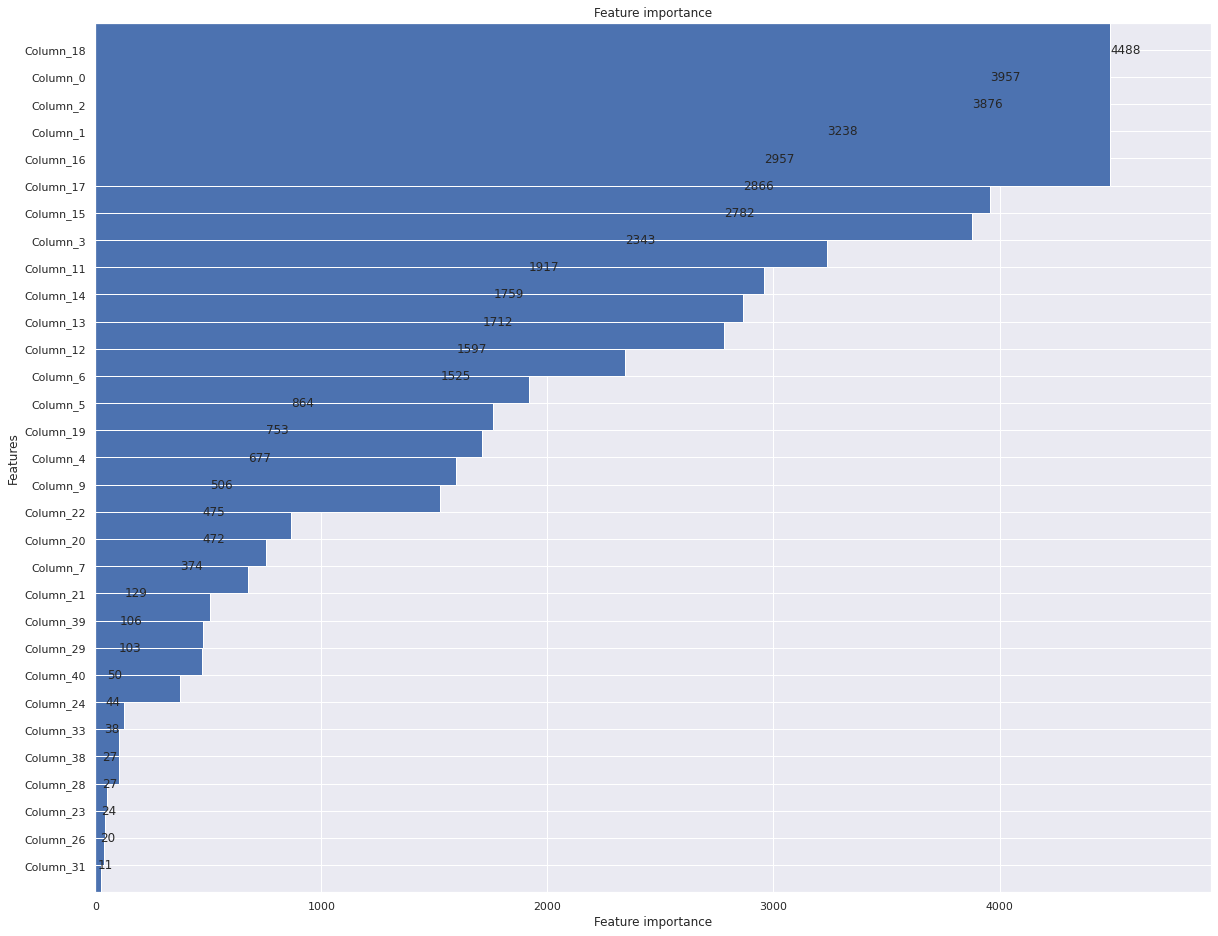

In [31]:
plt.rcParams["figure.figsize"] = (20, 16)
lgb.plot_importance(clf_lgb,max_num_features = 60, height=10)
data_train_clean.columns


## Grid Search CV
We use the Grid Search CV to find the best parameters for the model.

**How does it work ?**

Grid Search CV brute force the list of parameters we give it and find the best parameters by trying every combination of the parameters. Also, GSCV uses K-Fold CrossValidation to ensure that the parameters are the best for different version of the data.

We used it mostly on google colab because takes too much time on our computer.

**Best hyperparameters**

For XGBoost:
- colsample_bytree: 0.5, 
- learning_rate: 0.3 
- max_depth: 6, *Increased this parameter in our model to 8 to have a better performance. The more you increase this parameter the more you may have overfitting.* 
- n_estimators: 300

  
For LightGBM:
- max_bin=500
- max_depth = 8; 10 but more prone to overfitting?
- num_leaves = 400,
- min_data_in_leaf=300,
- learning_rate=0.1,
- n_estimators=1000 ; 2000 but more prone to overfitting

In [27]:
from sklearn.model_selection import GridSearchCV
params_XGBoost = { 'max_depth': range(6,10,1),
           'learning_rate': [0.3],
           'n_estimators': range(100,350,50),
           'colsample_bytree': [0.5]}

params_LGBM = { 'max_depth': range(6,10,2),
    'num_leaves' : [400],
    #range(300,600,100),
    'min_data_in_leaf':[300],
    'learning_rate':[0.1],
    'n_estimators':range(500,1000,500)
}

In [28]:
f1 = make_scorer(f1_score , average='macro')

In [111]:
xgbr = XGB()

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params_XGBoost,
                   scoring=f1, #f1_score
                   cv = 4,
                
                   verbose=1)

In [32]:
lgbm = lgb.LGBMClassifier()
clf_2 = GridSearchCV(estimator=lgbm, 
                   param_grid=params_LGBM,
                   scoring=f1, #f1_score
                   cv = 4,       
                   verbose=1)

In [33]:
#clf.fit(X, y)
clf_2.fit(X,y)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 wi

GridSearchCV(cv=4, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': range(6, 10, 2),
                         'min_data_in_leaf': [300],
                         'n_estimators': range(500, 1000, 500),
                         'num_leaves': [400]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [34]:
#print("Best parameters:", clf.best_params_)
#print("Best score:", clf.best_score_)

print("Best parameters:", clf_2.best_params_)
print("Best score:", clf_2.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_data_in_leaf': 300, 'n_estimators': 500, 'num_leaves': 400}
Best score: 0.7144033259125255


# Predict on the test dataset
- Use our best model to predict the isSold value on the test dataset.
- Add our results to the submission file.
- Submit directly to Kaggle using the Kaggle API.

In [ ]:
#Predict on the test set
y_testing = data_test.to_numpy()
#y_testing_pred = model.predict(y_testing)
y_testing_pred = clf_lgb.predict(y_testing)


In [ ]:
df_submission = pd.read_csv("testSubmissionFile.csv")
df_submission["isSold"] = y_testing_pred
df_submission.head()

,auctionId,isSold
0,00277acc-dee5-4065-a580-c49dbde5c02e_6c6fd7b0-...,False
1,0055d24f-bbf0-418d-84e7-df1d3124d6d6_60eaa750-...,True
2,005bc881-b650-4ccc-baa6-850c9710b0ea_15181501-...,False
3,008c5f32-c29f-4726-8315-a2a4f2d10fb2_a4a0167f-...,False
4,00f96be1-59f2-43b6-a6d1-0668001cd08c_1014d516-...,False


In [ ]:
df_submission.to_csv("testSubmissionFile_bestVersion.csv", index=False)

In [55]:
#Submit on Kaggle using the Kaggle API and bash command.
!kaggle competitions submit -c epf-montpellier-2022 -f testSubmissionFile_bestVersion.csv -m "Trying to get back to top 1 for sure !!"


100%|██████████████████████████████████████| 16.7M/16.7M [00:03<00:00, 5.71MB/s]
Successfully submitted to EPF MONTPELLIER 2022

## Train Model with Dask XGBoost

We tried to use the Dask Library to do parallel computing. We might used it wrong as it takes more time with this library...
Dask and Spark and tools that we need to look further in the future. 

In [55]:
import dask.dataframe as dd

In [56]:
from dask.distributed import Client, LocalCluster 
# local dask cluster 
cluster = LocalCluster(n_workers=6) 
client = Client(cluster) 
client

2022-06-10 00:09:23,123 - distributed.diskutils - INFO - Found stale lock file and directory '/home/lapbeer/Documents/epf/intro_ML/Teads-Kaggle-Competition/dask-worker-space/worker-qxp_y99p', purging
2022-06-10 00:09:23,125 - distributed.diskutils - INFO - Found stale lock file and directory '/home/lapbeer/Documents/epf/intro_ML/Teads-Kaggle-Competition/dask-worker-space/worker-y5t1qw2u', purging
2022-06-10 00:09:23,134 - distributed.diskutils - INFO - Found stale lock file and directory '/home/lapbeer/Documents/epf/intro_ML/Teads-Kaggle-Competition/dask-worker-space/worker-0q2jp45l', purging
2022-06-10 00:09:23,134 - distributed.diskutils - INFO - Found stale lock file and directory '/home/lapbeer/Documents/epf/intro_ML/Teads-Kaggle-Competition/dask-worker-space/worker-53q0sg7u', purging
2022-06-10 00:09:23,134 - distributed.diskutils - INFO - Found stale lock file and directory '/home/lapbeer/Documents/epf/intro_ML/Teads-Kaggle-Competition/dask-worker-space/worker-dkvnxdcd', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 12,Total memory: 15.43 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33021,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.43 GiB
Comm: tcp://127.0.0.1:40083,Total threads: 2
Dashboard: http://127.0.0.1:42185/status,Memory: 2.57 GiB
Nanny: tcp://127.0.0.1:37725,


In [57]:
dask_df = dd.from_pandas(data_train_clean, npartitions=20)

In [58]:
dask_df.head()

,placementId,websiteId,hashedRefererDeepThree,country,browser,browserVersion,integrationType,isSold,yearXcountry,monthXcountry,...,KaiOS,Linux,MRE,Mac OS,OS X,Tizen,Windows,iOS,macOS,unknown
0,0.389108,0.389108,0.500000,0.538145,0.397601,0.454817,2,False,0.538145,0.542201,...,0,0,0,0,0,0,1,0,0,0
1,0.758621,0.758621,0.700000,0.638926,0.593297,0.624459,1,False,0.638926,0.645408,...,0,0,0,0,0,0,0,0,0,0
2,0.608150,0.649976,0.649952,0.486247,0.593297,0.638249,2,True,0.486247,0.440361,...,0,0,0,0,0,0,0,0,0,0
3,0.456140,0.456140,0.538461,0.496360,0.516606,0.454817,1,True,0.496360,0.513021,...,0,0,0,0,0,0,0,0,0,0
4,0.118519,0.118519,0.363077,0.435467,0.593297,0.624459,1,False,0.435467,0.442099,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from dask_ml.model_selection import train_test_split 
# Create the train-test split 
X = dask_df.drop(columns=["isSold"]).to_dask_array(lengths=True)
y=dask_df["isSold"].to_dask_array(lengths=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [ ]:
from dask_ml.xgboost import XGBClassifier

model = XGBClassifier(
    objective="binary:logistic",
    max_depth=6,
    nthread=5,
    reg_lambda=20,
    sketch_eps=0.001,
    colsample_bytree=0.5,
    learning_rate=0.3,
    alpha=10,
    n_estimators=120,
)

# Create the XGBoost DMatrices 
#dtrain = xgb.dask.DaskDMatrix(client, X_train, y_train) 
#dtest = xgb.dask.DaskDMatrix(client, X_test, y_test) 
# train the model 
model.fit(X_train, y_train)

In [61]:
y_pred_dask = model.predict(X_test)


In [ ]:
y_pred_computed = y_pred_dask.compute()
y_test_computed = y_test.compute()

y_pred_training = model.predict(X_train)
y_pred_computed_training = y_pred_training.compute()
y_train_computed = y_train.compute()


In [63]:
f1_score(y_test_computed,y_pred_computed),f1_score(y_train_computed,y_pred_computed_training)

(0.7746131575741049, 0.7783181714358872)